In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load data và xử lý dữ liệu thô

In [120]:
hpg =pd.read_csv('/Users/binh230901/Desktop/DA/project/finance/MA_BB/Dữ liệu Lịch sử HPG.csv')

In [121]:
# format datetime
hpg['Ngày'] = pd.to_datetime(hpg['Ngày'], format= '%d/%m/%Y')

In [122]:
# rename lại tên cột
hpg.rename(columns={'Ngày' : 'date',
                    'Lần cuối': 'close',
                    'Mở': 'open',
                    'Cao': 'high',
                    'Thấp': 'low',
                    'KL': 'vol',
                    '% Thay đổi': '%change'
                   }, inplace= True)

In [123]:
# loại bỏ 2 chữ số cuối
# sau đó thay dấu '.' thành ',' rồi chuyển sang dạng float

for i in hpg.columns.values[1:5]:
    hpg[i] = hpg[i].apply(lambda x: x[0:-2])
    hpg[i] = hpg[i].str.replace(',', '.').astype(float)
hpg

,date,close,open,high,low,vol,%change
0,2022-06-22,21.400,20.800,21.800,20.650,12.03M,2.88%
1,2022-06-21,20.800,21.350,21.500,20.500,39.94M,-3.70%
2,2022-06-20,21.600,22.750,23.000,21.600,37.27M,-6.90%
3,2022-06-17,23.200,23.450,23.500,21.950,30.24M,-1.11%
4,2022-06-16,23.461,22.818,23.726,22.629,43.40M,5.44%
...,...,...,...,...,...,...,...
74,2022-03-07,38.673,37.992,39.733,37.841,49.99M,2.61%
75,2022-03-04,37.689,38.598,38.825,37.689,43.39M,-0.60%
76,2022-03-03,37.916,36.024,37.916,35.797,99.11M,6.82%
77,2022-03-02,35.495,35.570,35.835,35.268,25.86M,0.00%


In [190]:
hpg.sort_values(by='date', inplace= True)

In [124]:
hpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     79 non-null     datetime64[ns]
 1   close    79 non-null     float64       
 2   open     79 non-null     float64       
 3   high     79 non-null     float64       
 4   low      79 non-null     float64       
 5   vol      79 non-null     object        
 6   %change  79 non-null     object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 4.4+ KB


# MA 30


In [141]:
hpg_ma = hpg[['date','close']]
hpg_ma.sort_values(by='date', inplace= True)
# dùng hàm rolling để cuộn qua 30 ngày sau đó lấy giá trị trung bình 
hpg_ma['MA'] = hpg_ma.rolling(window= 30).mean()
hpg_ma

<ipython-input-141-af03a3b80cab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpg_ma.sort_values(by='date', inplace= True)
<ipython-input-141-af03a3b80cab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpg_ma['MA'] = hpg_ma.rolling(window= 30).mean()


,date,close,MA
78,2022-03-01,35.495,NaN
77,2022-03-02,35.495,NaN
76,2022-03-03,37.916,NaN
75,2022-03-04,37.689,NaN
74,2022-03-07,38.673,NaN
...,...,...,...
4,2022-06-16,23.461,26.811233
3,2022-06-17,23.200,26.530067
2,2022-06-20,21.600,26.242233
1,2022-06-21,20.800,25.898733


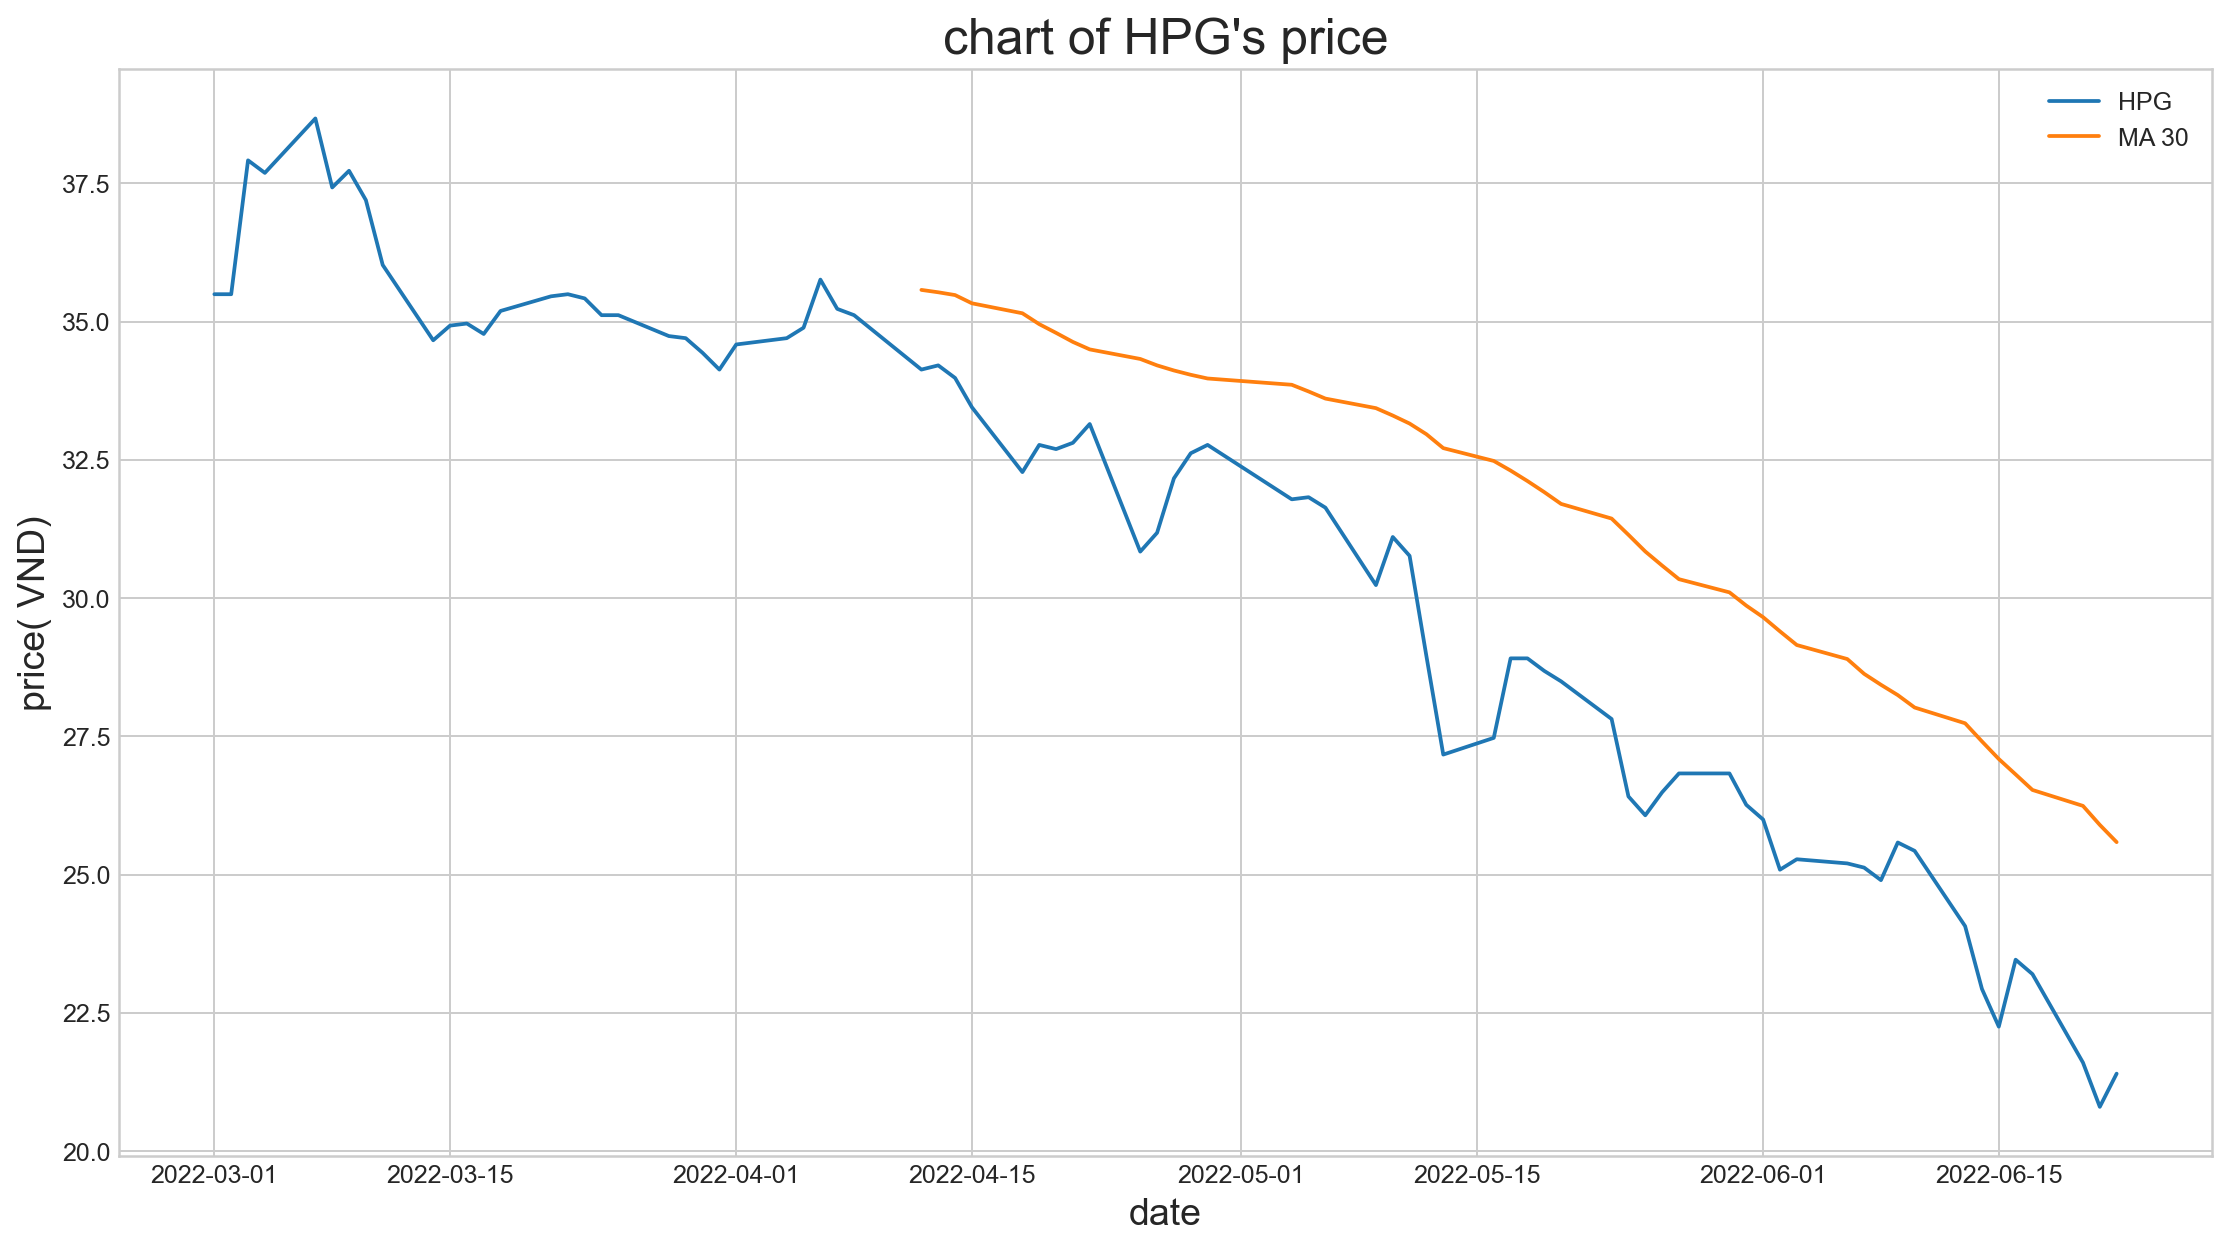

In [200]:
# vẽ biểu đồ
# hpg_ma.plot.line(x= 'date', y= ['close', 'MA'], label= ['HPG', 'MA-30'])
plt.style.use('seaborn-whitegrid')
plt.figure(figsize= (15,8), dpi= 180)
plt.plot(hpg_ma['date'],hpg_ma['close'], label= 'HPG')
plt.plot(hpg_ma['date'],hpg_ma['MA'], label= 'MA 30')
plt.xlabel('date', fontsize= 15)
plt.ylabel('price( VND)', fontsize= 15)
plt.title('chart of HPG\'s price', fontsize= 20)
plt.legend();

# Bollinger Band (BB)

In [191]:
# create new table with date and close
hpg_bb = hpg[['date', 'close']]
hpg_bb
# MA 20
hpg_bb['MA_20'] = hpg_bb.rolling(window= 20).mean()
hpg_bb

<ipython-input-191-587fbf0a108f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpg_bb['MA_20'] = hpg_bb.rolling(window= 20).mean()


,date,close,MA_20
78,2022-03-01,35.495,NaN
77,2022-03-02,35.495,NaN
76,2022-03-03,37.916,NaN
75,2022-03-04,37.689,NaN
74,2022-03-07,38.673,NaN
...,...,...,...
4,2022-06-16,23.461,25.52525
3,2022-06-17,23.200,25.26055
2,2022-06-20,21.600,24.94990
1,2022-06-21,20.800,24.66925


In [192]:
# upper band= ma_20 + 2*std
std = hpg_bb['close'].rolling(window= 20).std()
hpg_bb['upper_band'] = hpg_bb['MA_20'] + 2*std
hpg_bb

<ipython-input-192-3c629d4879a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpg_bb['upper_band'] = hpg_bb['MA_20'] + 2*std


,date,close,MA_20,upper_band
78,2022-03-01,35.495,NaN,NaN
77,2022-03-02,35.495,NaN,NaN
76,2022-03-03,37.916,NaN,NaN
75,2022-03-04,37.689,NaN,NaN
74,2022-03-07,38.673,NaN,NaN
...,...,...,...,...
4,2022-06-16,23.461,25.52525,28.602837
3,2022-06-17,23.200,25.26055,28.169043
2,2022-06-20,21.600,24.94990,28.032496
1,2022-06-21,20.800,24.66925,28.182896


In [193]:
# lower band
hpg_bb['lower_band'] = hpg_bb['MA_20'] - 2*std
hpg_bb

<ipython-input-193-dd28858ff62b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpg_bb['lower_band'] = hpg_bb['MA_20'] - 2*std


,date,close,MA_20,upper_band,lower_band
78,2022-03-01,35.495,NaN,NaN,NaN
77,2022-03-02,35.495,NaN,NaN,NaN
76,2022-03-03,37.916,NaN,NaN,NaN
75,2022-03-04,37.689,NaN,NaN,NaN
74,2022-03-07,38.673,NaN,NaN,NaN
...,...,...,...,...,...
4,2022-06-16,23.461,25.52525,28.602837,22.447663
3,2022-06-17,23.200,25.26055,28.169043,22.352057
2,2022-06-20,21.600,24.94990,28.032496,21.867304
1,2022-06-21,20.800,24.66925,28.182896,21.155604


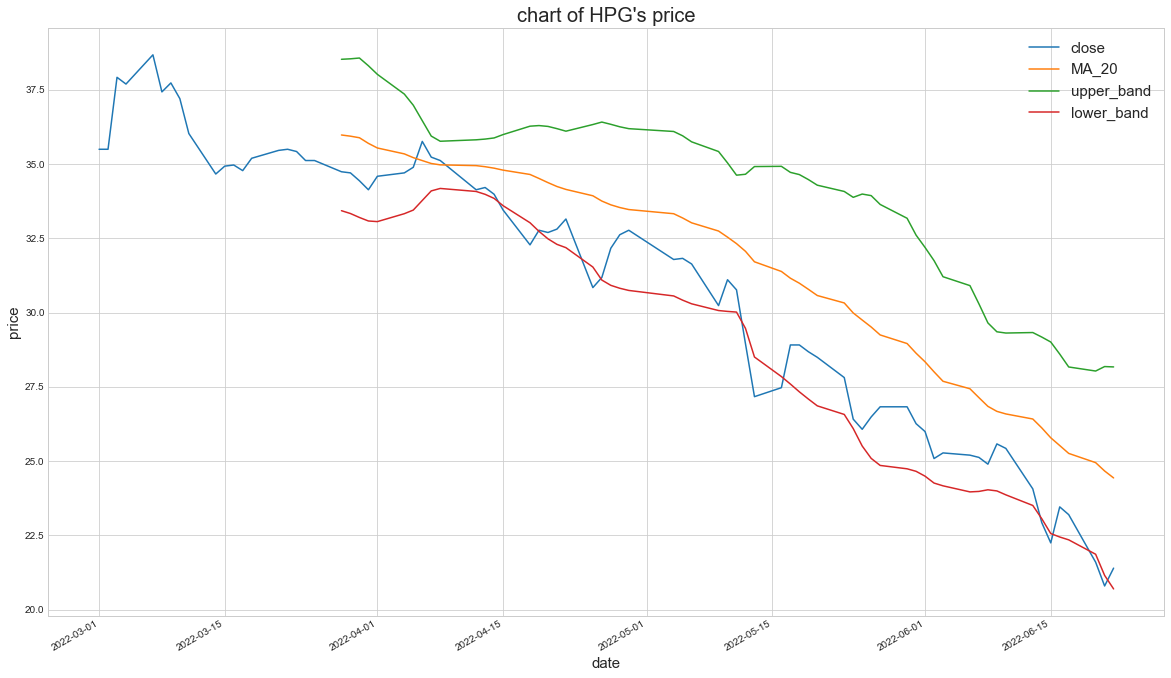

In [207]:
# plot 
hpg_bb.plot.line(x= 'date', y= ['close', 'MA_20', 'upper_band', 'lower_band'], figsize= (20, 12))
plt.xlabel('date', fontsize= 15)
plt.ylabel('price', fontsize= 15)
plt.legend(fontsize= 15)
plt.title('chart of HPG\'s price', fontsize= 20);